In [1]:
import pandas as pd
import seaborn as sns
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
from bokeh.plotting import figure, output_notebook, show
output_notebook()

Loading BokehJS ...

In [84]:
path = 'http://datos.salud.gob.ar/dataset/76d53a00-a42f-45c7-81be-197b6c357937/resource/509979de-3a24-4f86-8859-15e177eccb20/download/emse_datosabiertos.zip'
df = pd.read_csv(path)
df.head()


,sitio,record,q1,texto_q1,q2,texto_q2,q3,texto_q3,q4,q5,...,texto_qnpa5g,qnpa7g,texto_qnpa7g,qnpe3g,texto_qnpe3g,qnpe5g,texto_qnpe5g,weight,stratum,psu
0,AG,1,3.0,13 años,2.0,Femenino,2.0,9no grado nivel Primario/Polimodal o 2do año n...,NaN,NaN,...,Si,1.0,Si,2.0,No,2.0,No,457.09,201801010,19
1,AG,2,3.0,13 años,2.0,Femenino,2.0,9no grado nivel Primario/Polimodal o 2do año n...,NaN,NaN,...,Si,2.0,No,2.0,No,2.0,No,457.09,201801010,19
2,AG,3,4.0,14 años,1.0,Masculino,4.0,2do año/11vo grado nivel Polimodal o 4to año n...,1.67,56.0,...,Si,2.0,No,2.0,No,2.0,No,261.44,201801010,19
3,AG,4,6.0,16 años,1.0,Masculino,2.0,9no grado nivel Primario/Polimodal o 2do año n...,1.73,70.0,...,No,2.0,No,1.0,Si,1.0,Si,550.90,201801010,19
4,AG,5,3.0,13 años,2.0,Femenino,2.0,9no grado nivel Primario/Polimodal o 2do año n...,NaN,NaN,...,No,2.0,No,2.0,No,2.0,No,457.09,201801010,19


In [235]:
#df.rename(columns={'q1':'edad', 'q2':'sexo', 'q3':'grado',
#                   'q6':'estatura', 'q5':'peso', 'q6':'apetencia',
#                   'q10':'fast food', 'q15':'bullyng', 'q16':'peleas',
#                   'q17':'lesion grave', 'q18':'tipo lesion',
#                   'q19':'causa lesion', 'q22':'soledad',
#                   'q23':'preocupacion-insomnio', 'q24':'considero suicidio',
#                   'q25':'plan suicidio', 'q26':'intentos suicidio',
#                   'q27':'amigos cercanos', 'q28':'primer cigarillo',
#                   'q29':'cigarrillos', 'q30':'tabaco'}, inplace=True)
#df.head()

In [3]:
df.describe()

,record,q1,q2,q3,q4,q5,q6,q10,q15,q16,...,qnnotb2g,qnbcanyg,qnc1g,qnpa5g,qnpa7g,qnpe3g,qnpe5g,weight,stratum,psu
count,56981.000000,56873.000000,56445.000000,55920.000000,36052.000000,36052.000000,56482.000000,56771.000000,56741.000000,56713.000000,...,55908.000000,19735.000000,19696.000000,55551.000000,55551.000000,55032.000000,55032.000000,56981.000000,5.698100e+04,56981.000000
mean,28535.389832,4.905403,1.520188,3.064485,1.642857,60.212193,1.460448,1.802734,1.361573,1.496447,...,1.208968,1.089891,1.330575,1.701932,1.828428,1.633431,1.687237,46.288166,2.018129e+08,12.438234
std,16479.971553,1.358115,0.499597,1.324451,0.096898,14.723909,0.764121,1.451475,1.079432,1.211089,...,0.406575,0.286033,0.470432,0.457414,0.377011,0.481872,0.463623,80.162741,7.068990e+03,9.378964
min,1.000000,1.000000,1.000000,1.000000,1.200000,27.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.120000,2.018010e+08,1.000000
25%,14263.000000,4.000000,1.000000,2.000000,1.570000,51.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,14.420000,2.018070e+08,6.000000
50%,28522.000000,5.000000,2.000000,3.000000,1.640000,58.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,26.370000,2.018130e+08,11.000000
75%,42804.000000,6.000000,2.000000,4.000000,1.700000,66.000000,2.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,44.780000,2.018200e+08,17.000000
max,57095.000000,8.000000,2.000000,5.000000,2.030000,187.000000,5.000000,8.000000,8.000000,8.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1192.430000,2.018240e+08,57.000000


In [5]:
df_age = df['q1']
print(df_age.value_counts().sort_index())
print('nan     ',df_age.isnull().sum())

1.0       48
2.0      145
3.0    10574
4.0    12946
5.0    12812
6.0    11738
7.0     8227
8.0      383
Name: q1, dtype: int64
nan      108


In [151]:
def print_resume(data : pd.DataFrame, column_name : str, fields : list):
    _df = data[column_name].value_counts().sort_index()
    _df = _df.reset_index(drop=True)
    _total = _df.sum()
    index = 0    
    for field in fields:
        
        print(field.ljust(25) +
              f'{_df[index]}'.rjust(6) +
              f'{round(_df[index] / _total * 100, 2)}%'.rjust(7))
        index += 1

# Distribución por edades

In [152]:
# STATS
print_resume(df, 'q1',['11 años o menos',
                       '12 años', '13 años',
                        '14 años', '15 años',
                        '16 años', '17 años',
                        '18 años o más'])
# PLOT                       
df_age = df['q1'].value_counts().sort_index()
p = figure(title="Distribución por edades",
           sizing_mode = "stretch_both",
           plot_width=500, plot_height=400,
           x_axis_label="Edad",
           y_axis_label="Cantidad")
p.vbar(x=df_age.index,top=df_age.values, width=0.9)
p.xaxis.ticker = [1, 2, 3, 4, 5, 6, 7, 8]
p.xaxis.major_label_overrides = {1: '11 años o menos' ,
                                 2: '12 años', 3: '13 años',
                                 4: '14 años', 5: '15 años',
                                 6: '16 años', 7:'17 años',
                                 8: '18 años o más',}
show(p)


11 años o menos              48  0.08%
12 años                     145  0.25%
13 años                   10574 18.59%
14 años                   12946 22.76%
15 años                   12812 22.53%
16 años                   11738 20.64%
17 años                    8227 14.47%
18 años o más               383  0.67%


El rango de edades se concentra entre los 13 y 17 años de edad.

# Distribución por Sexo

In [153]:
print_resume(df, 'q2',['Masculino',  'Femenino'])
df_sex = df['q2'].value_counts().sort_index()
p = figure(title="Distribución por Sexo",           
           plot_width=400, plot_height=400,
           x_axis_label="Sexo",
           y_axis_label="Cantidad")
p.vbar(x=df_sex.index,top=df_sex.values, width=0.9)
p.xaxis.ticker = [1, 2]
p.xaxis.major_label_overrides = {1:'Masculino', 2:'Femenino'}

show(p)

Masculino                 27083 47.98%
Femenino                  29362 52.02%


# Distribución de alturas

Text(1.827, 2373.15, '    Std = 0.1')

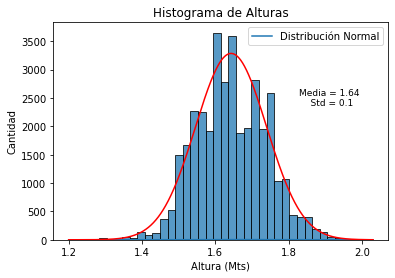

In [95]:
loc, scale = norm.fit(df['q4'].dropna())
x = np.linspace(df['q4'].min(), df['q4'].max(),1000)
y = norm(scale=scale, loc=loc).pdf(x)
fig, axe = plt.subplots()
axe.plot(x,y, label="Distribución Normal") 
df['q4'].value_counts()
g = sns.histplot(data=df['q4'], bins=40)
y = (y / y.max())* max([h.get_height() for h in g.patches]) * 0.9
g = sns.lineplot(x=x,y=y, color='red')
g.set_xlabel('Altura (Mts)')
g.set_ylabel('Cantidad')
g.set_title('Histograma de Alturas')
g.text(df['q4'].max() * 0.9, max([h.get_height() for h in g.patches]) * 0.7,'Media = '+ str(round(loc,2)), fontsize=9)
g.text(df['q4'].max() * 0.9, max([h.get_height() for h in g.patches]) * 0.65,'    Std = '+ str(round(scale,2)), fontsize=9) 



Podemos observar que el Histograma de alturas sigue una distribucion normal con una media de 1.64 mts con una desviación estandar de 0.1 mts

# Distribución de peso

Text(149.6, 3538.6, '    Std = 14.72 ')

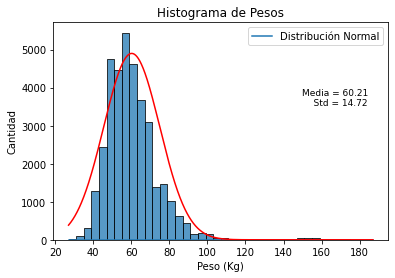

In [96]:
loc, scale = norm.fit(df['q5'].dropna())
x = np.linspace(df['q5'].min(), df['q5'].max(),1000)
y = norm(scale=scale, loc=loc).pdf(x)
fig, axe = plt.subplots()
axe.plot(x,y, label="Distribución Normal") 
df['q4'].value_counts()
g = sns.histplot(data=df['q5'], bins=40)
y = (y / y.max())* max([h.get_height() for h in g.patches]) * 0.9
g = sns.lineplot(x=x,y=y, color='red')
g.set_xlabel('Peso (Kg)')
g.set_ylabel('Cantidad')
g.set_title('Histograma de Pesos')
g.text(df['q5'].max() * 0.8, max([h.get_height() for h in g.patches]) * 0.7, f'Media = {round(loc,2)} ', fontsize=9)
g.text(df['q5'].max() *0.8, max([h.get_height() for h in g.patches]) * 0.65, f'    Std = {round(scale,2)} ', fontsize=9) 

Podemos observar que el Histograma de peso sigue una distribucion normal con una media de 60.21 Kgs con una desviación estandar de 14.72 Kgs

# Alimentación

## INDICE DE MASA CORPORAL
Para establecer la condicion utilizaremos para el calculo el indice de masa corporal. 
Estableceremos las siguientes categorias en base al IMC que se almacenaran en la feature "condicion":
* Percentil <5:         Peso Bajo =      1 
* Percentil >= 5 y <85: Peso saludable = 2
* Percentil >=85 y <95: Sobrepeso =      3
* Percentil > 95:       Obsesidad =      4    


In [85]:
df['IMC'] = df['q5'] / (df['q4'] ** 2)
df['IMC'].describe()

count    36052.000000
mean        22.234716
std          4.759118
min         11.428571
25%         19.531250
50%         21.564545
75%         23.875115
max         70.908113
Name: IMC, dtype: float64

In [99]:
df['condicion'] = None
df.loc[df['IMC'] < df['IMC'].quantile(0.05), 'condicion'] = 1
df.loc[(df['IMC'] >= df['IMC'].quantile(0.05)) & (df['IMC'] < df['IMC'].quantile(0.85)), 'condicion'] = 2
df.loc[(df['IMC'] >= df['IMC'].quantile(0.85)) & (df['IMC'] < df['IMC'].quantile(0.95)), 'condicion'] = 3
df.loc[df['IMC'] > df['IMC'].quantile(0.95), 'condicion'] = 4
print_resume(df, 'condicion', ['Peso Bajo', 'Saludable',
                               'Sobrepeso', 'Obesidad'])


Peso Bajo          1795  4.98%
Saludable         28847 80.03%
Sobrepeso          3603  10.0%
Obesidad           1802   5.0%


## Durante los últimos 30 días ¿con qué frecuencia te quedaste con hambre porque no había suficiente comida en tu hogar?
### Total de la muestra

In [71]:
print_resume(df, 'q6', ['Nunca', 'Rara vez',
                        'Algunas veces', 'Casi siempre',
                        'Siempre'])

Nunca             38257 67.73%
Rara vez          11820 20.93%
Algunas veces      5342  9.46%
Casi siempre        749  1.33%
Siempre             314  0.56%


### Personas con bajo peso

In [107]:
print_resume(df[df['condicion'] == 1], 'q6', ['Nunca', 'Rara vez',
                        'Algunas veces', 'Casi siempre',
                        'Siempre'])

Nunca              1218 68.47%
Rara vez            357 20.07%
Algunas veces       168  9.44%
Casi siempre         31  1.74%
Siempre               5  0.28%


### Personas con peso normal 

In [109]:
print_resume(df[df['condicion'] == 2], 'q6', ['Nunca', 'Rara vez',
                        'Algunas veces', 'Casi siempre',
                        'Siempre'])

Nunca             19756 68.87%
Rara vez           5938  20.7%
Algunas veces      2542  8.86%
Casi siempre        337  1.17%
Siempre             115   0.4%


### Personas con sobrepeso

In [110]:
print_resume(df[df['condicion'] == 3], 'q6', ['Nunca', 'Rara vez',
                        'Algunas veces', 'Casi siempre',
                        'Siempre'])

Nunca              2460  68.7%
Rara vez            719 20.08%
Algunas veces       337  9.41%
Casi siempre         41  1.14%
Siempre              24  0.67%


### Personas obesas

In [106]:
print_resume(df[df['condicion'] == 4], 'q6', ['Nunca', 'Rara vez',
                        'Algunas veces', 'Casi siempre',
                        'Siempre'])

Nunca              1198 66.93%
Rara vez            378 21.12%
Algunas veces       173  9.66%
Casi siempre         33  1.84%
Siempre               8  0.45%


Los numeros señalas que no hay una diferencia apreciable que indique que alguno de las categorias dentro de "condicion" hayan pasado hambre más cantidad de veces que el resto. 

## Durante los últimos 7 días, ¿cuántos días comiste en un restaurante de comida rápida como  McDonald’s, Burger King, Mostaza, una hamburguesería o panchería?
### Total de la muestra

In [72]:
print_resume(df, 'q10', ['0 dias', '1 dia',
                         '2 dias', '3 dias',
                         '4 dias', '5 dias',
                         '6 dias', '7 dias'])

0 dias            35326 62.23%
1 dia             11014  19.4%
2 dias             4964  8.74%
3 dias             2296  4.04%
4 dias             1001  1.76%
5 dias              590  1.04%
6 dias              272  0.48%
7 dias             1308   2.3%


### Personas de bajo peso

In [111]:
print_resume(df[df[ 'condicion'] == 1], 'q10', ['0 dias', '1 dia',
                         '2 dias', '3 dias',
                         '4 dias', '5 dias',
                         '6 dias', '7 dias'])

0 dias             1044 58.32%
1 dia               362 20.22%
2 dias              168  9.39%
3 dias               98  5.47%
4 dias               35  1.96%
5 dias               31  1.73%
6 dias                3  0.17%
7 dias               49  2.74%


### Personas de peso normal

In [112]:
print_resume(df[df[ 'condicion'] == 2], 'q10', ['0 dias', '1 dia',
                         '2 dias', '3 dias',
                         '4 dias', '5 dias',
                         '6 dias', '7 dias'])

0 dias            17594 61.14%
1 dia              5886 20.45%
2 dias             2682  9.32%
3 dias             1171  4.07%
4 dias              467  1.62%
5 dias              279  0.97%
6 dias              130  0.45%
7 dias              569  1.98%


### Personas con sobrepeso

In [113]:
print_resume(df[df[ 'condicion'] == 3], 'q10', ['0 dias', '1 dia',
                         '2 dias', '3 dias',
                         '4 dias', '5 dias',
                         '6 dias', '7 dias'])

0 dias             2390 66.43%
1 dia               662  18.4%
2 dias              256  7.12%
3 dias              122  3.39%
4 dias               54   1.5%
5 dias               32  0.89%
6 dias               16  0.44%
7 dias               66  1.83%


### Personas con obesidad

In [114]:
print_resume(df[df[ 'condicion'] == 4], 'q10', ['0 dias', '1 dia',
                         '2 dias', '3 dias',
                         '4 dias', '5 dias',
                         '6 dias', '7 dias'])

0 dias             1208 67.11%
1 dia               317 17.61%
2 dias              118  6.56%
3 dias               46  2.56%
4 dias               37  2.06%
5 dias               12  0.67%
6 dias                6  0.33%
7 dias               56  3.11%


In [123]:
df_temp = pd.DataFrame()
df_temp[['Peso', 'Fast Food']] = df[['q5', 'q10']]
print('Correlación')
df_temp.corr()

Correlación


,Peso,Fast Food
Peso,1.000000,-0.038915
Fast Food,-0.038915,1.000000


Podemos observar que se asciende de categoria en "condicion" el porcentaje de personas que consumieron al menos alguna vez fast food en la semana aumenta lo que indicaria a priori un relación entre estas variables. 
Si calculamos la correlación entre peso y cantidad de dias que comieron comida rapida en la ultima semana podemos concluir que la relación entre ambas es despreciable.

# TABAQUISMO ADOLESCENTE
## ¿Qué edad tenías cuando probaste un cigarrillo por primera vez?

In [128]:
fields = ['Nunca probé cigarrillos', '7 años de edad o menos',
          '8 o 9 años', '10 u 11 años', '12 o 13 años',
          '14 o 15 años', '16 o 17 años', '18 años o más']
print_resume(df, 'q28', fields)

Nunca probé cigarrillos   33312 59.68%
7 años de edad o menos     1291  2.31%
8 o 9 años                 1645  2.95%
10 u 11 años               3330  5.97%
12 o 13 años               7401 13.26%
14 o 15 años               6944 12.44%
16 o 17 años               1874  3.36%
18 años o más                17  0.03%


Mas del 40% de los adolescentes probaron alguna vez el cigarrillo
## Masculinos

In [160]:
fields = ['Nunca probé cigarrillos', '7 años de edad o menos',
          '8 o 9 años', '10 u 11 años', '12 o 13 años',
          '14 o 15 años', '16 o 17 años', '18 años o más']
print_resume(df[df['q2'] == 1], 'q28', fields)

Nunca probé cigarrillos   16118 60.96%
7 años de edad o menos      680  2.57%
8 o 9 años                  835  3.16%
10 u 11 años               1744   6.6%
12 o 13 años               3172  12.0%
14 o 15 años               2992 11.32%
16 o 17 años                889  3.36%
18 años o más                12  0.05%


## Femeninos

In [161]:
fields = ['Nunca probé cigarrillos', '7 años de edad o menos',
          '8 o 9 años', '10 u 11 años', '12 o 13 años',
          '14 o 15 años', '16 o 17 años', '18 años o más']
print_resume(df[df['q2'] == 2], 'q28', fields)

Nunca probé cigarrillos   16919 58.58%
7 años de edad o menos      585  2.03%
8 o 9 años                  796  2.76%
10 u 11 años               1558  5.39%
12 o 13 años               4156 14.39%
14 o 15 años               3895 13.49%
16 o 17 años                968  3.35%
18 años o más                 4  0.01%


En proporcion  el porcentaje de personas de sexo femenino que probo alguna vez el cigarrillo es mayor que las personas de sexo masculino (2.38%).

In [156]:
fields = [ '7 años de edad o menos',
          '8 o 9 años', '10 u 11 años', '12 o 13 años',
          '14 o 15 años', '16 o 17 años', '18 años o más']
df_temp = df['q28'] - 1
print_resume(df[df['q28'] > 1], 'q28', fields)

7 años de edad o menos     1291  5.74%
8 o 9 años                 1645  7.31%
10 u 11 años               3330  14.8%
12 o 13 años               7401 32.89%
14 o 15 años               6944 30.86%
16 o 17 años               1874  8.33%
18 años o más                17  0.08%


Mas del 60% de los que probaron cigarrillo lo hicieron entre los 12 y 15 años.

In [163]:
fields = [ '0 dias', '1 o 2 dias', '3 a 5 dias',
           '6 a 9 dias', '10 a 19 dias', '20 a 29 dias',
           'los 30 dias']
print_resume(df[df['q28'] > 1], 'q29', fields)

0 dias                    11325 50.66%
1 o 2 dias                 4593 20.55%
3 a 5 dias                 1801  8.06%
6 a 9 dias                 1213  5.43%
10 a 19 dias               1238  5.54%
20 a 29 dias                758  3.39%
los 30 dias                1426  6.38%


Si consideramos como fumador a la persona que lo hace todos los dias podemos concluir que de aquellas personas que han probado el cigarrillo el 6.38% se han convertido en fumadores.

### Masculinos

In [164]:
print_resume(df[(df['q28'] > 1) & (df['q2'] == 1)], 'q29', fields)

0 dias                     5396  52.6%
1 o 2 dias                 1966 19.17%
3 a 5 dias                  750  7.31%
6 a 9 dias                  558  5.44%
10 a 19 dias                521  5.08%
20 a 29 dias                338  3.29%
los 30 dias                 729  7.11%


### Femeninos

In [165]:
print_resume(df[(df['q28'] > 1) & (df['q2'] == 2)], 'q29', fields)

0 dias                     5843 49.17%
1 o 2 dias                 2575 21.67%
3 a 5 dias                 1037  8.73%
6 a 9 dias                  644  5.42%
10 a 19 dias                698  5.87%
20 a 29 dias                411  3.46%
los 30 dias                 676  5.69%


Las personas de sexo masculino presentan un mayor porcentaje de conversión a fumadores.

# Influencia de tener padres fumadores

In [172]:
df['padres fumadores'] = 0
df.loc[(df['q34'] >=2) & (df['q34'] <=4) , 'padres fumadores'] = 1 

In [179]:
df['padres fumadores'].sum()

10971

## Padres Fumadores

In [181]:
print_resume(df[(df['padres fumadores'] == 1) & (df['q28'] > 1)], 'q29', fields)

0 dias                     2893 45.33%
1 o 2 dias                 1323 20.73%
3 a 5 dias                  577  9.04%
6 a 9 dias                  401  6.28%
10 a 19 dias                403  6.31%
20 a 29 dias                226  3.54%
los 30 dias                 559  8.76%


## Padres No Fumadores

In [182]:
print_resume(df[(df['padres fumadores'] == 0) & (df['q28'] > 1)], 'q29', fields)

0 dias                     8432 52.79%
1 o 2 dias                 3270 20.47%
3 a 5 dias                 1224  7.66%
6 a 9 dias                  812  5.08%
10 a 19 dias                835  5.23%
20 a 29 dias                532  3.33%
los 30 dias                 867  5.43%


De los datos anteriores se deduce una clara influencia de las conductas de tabaquismo en los padres. Si los padres son fumadores hay un mayor porcentaje de que sus hijos lo sean. 

In [46]:
print('Categorias:')
print(f'Bajo Peso: {df_o["Bajo Peso"].sum()}')
print(f'Normal: {df_o["Normal"].sum()}')     
print(f'Sobre Peso: {df_o["Sobrepeso"].sum()}')     
print(f'Obesidad: {df_o["Obeso"].sum()}')             

Categorias:
Bajo Peso: 1641
Normal: 26540
Sobre Peso: 3302
Obesidad: 1652


In [162]:
df_temp = df_o[df_o['Bajo Peso'] == 1].sample(frac=1)
df_train = df_temp.iloc[0: round(df_o['Bajo Peso'].sum()*0.8)]
df_val = df_temp.iloc[round(df_o['Bajo Peso'].sum()*0.8) : round(df_o['Bajo Peso'].sum()*0.9)]
df_test = df_temp.iloc[round(df_o['Bajo Peso'].sum()*0.9) :]
df_temp = df_o[df_o['Normal'] == 1]
df_train = df_train.append(df_temp.iloc[0: round(df_o['Bajo Peso'].sum()*0.8)])
df_val = df_val.append(df_temp.iloc[round(df_o['Bajo Peso'].sum()*0.8) : round(df_o['Bajo Peso'].sum()*0.9)])
df_test = df_test.append(df_temp.iloc[round(df_o['Bajo Peso'].sum()*0.9) : df_o['Bajo Peso'].sum()])
df_temp = df_o[df_o['Sobrepeso'] == 1]
df_train = df_train.append(df_temp.iloc[0: round(df_o['Bajo Peso'].sum()*0.8)])
df_val = df_val.append(df_temp.iloc[round(df_o['Bajo Peso'].sum()*0.8) : round(df_o['Bajo Peso'].sum()*0.9)])
df_test = df_test.append(df_temp.iloc[round(df_o['Bajo Peso'].sum()*0.9) : df_o['Bajo Peso'].sum()])
df_temp = df_o[df_o['Obeso'] == 1]
df_train = df_train.append(df_temp.iloc[0: round(df_o['Bajo Peso'].sum()*0.8)])
df_val = df_val.append(df_temp.iloc[round(df_o['Bajo Peso'].sum()*0.8) : round(df_o['Bajo Peso'].sum()*0.9)])
df_test = df_test.append(df_temp.iloc[round(df_o['Bajo Peso'].sum()*0.9) : df_o['Bajo Peso'].sum()])


In [155]:
print(df_train.shape)
print(df_val.shape)
print(df_test.shape)

(5252, 19)
(656, 19)
(656, 19)


In [156]:
print('Categorias Train:')
print(f'Bajo Peso: {df_train["Bajo Peso"].sum()}')
print(f'Normal: {df_train["Normal"].sum()}')     
print(f'Sobre Peso: {df_train["Sobrepeso"].sum()}')     
print(f'Obesidad: {df_train["Obeso"].sum()}')     

Categorias Train:
Bajo Peso: 1313
Normal: 1313
Sobre Peso: 1313
Obesidad: 1313


In [157]:
print('Categorias Validation:')
print(f'Bajo Peso: {df_val["Bajo Peso"].sum()}')
print(f'Normal: {df_val["Normal"].sum()}')     
print(f'Sobre Peso: {df_val["Sobrepeso"].sum()}')     
print(f'Obesidad: {df_val["Obeso"].sum()}')      

Categorias Validation:
Bajo Peso: 164
Normal: 164
Sobre Peso: 164
Obesidad: 164


In [158]:
print('Categorias Test:')
print(f'Bajo Peso: {df_test["Bajo Peso"].sum()}')
print(f'Normal: {df_test["Normal"].sum()}')     
print(f'Sobre Peso: {df_test["Sobrepeso"].sum()}')     
print(f'Obesidad: {df_test["Obeso"].sum()}') 

Categorias Test:
Bajo Peso: 164
Normal: 164
Sobre Peso: 164
Obesidad: 164


In [163]:
df_train.drop(['Altura','Peso','Atacado', 'IMC'], axis=1, inplace=True)
df_test.drop(['Altura','Peso','Atacado', 'IMC'], axis=1, inplace=True)
df_val.drop(['Altura','Peso','Atacado', 'IMC'], axis=1, inplace=True)

In [164]:
x_train = df_train.drop(['Bajo Peso', 'Normal', 'Sobrepeso', 'Obeso'], axis=1).to_numpy()
y_train = df_train[['Bajo Peso', 'Normal', 'Sobrepeso', 'Obeso']] .to_numpy()
x_val = df_val.drop(['Bajo Peso', 'Normal', 'Sobrepeso', 'Obeso'], axis=1).to_numpy()
y_val = df_val[['Bajo Peso', 'Normal', 'Sobrepeso', 'Obeso']] .to_numpy()
x_test = df_test.drop(['Bajo Peso', 'Normal', 'Sobrepeso', 'Obeso'], axis=1).to_numpy()
y_test = df_test[['Bajo Peso', 'Normal', 'Sobrepeso', 'Obeso']] .to_numpy()


In [167]:
print('x_train: ',x_train.shape,'y_train: ', y_train.shape)
print('x_val: ',x_val.shape,'y_val: ', y_val.shape)
print('x_test: ',x_test.shape,'y_test: ', y_test.shape)

x_train:  (5252, 11) y_train:  (5252, 4)
x_val:  (656, 11) y_val:  (656, 4)
x_test:  (656, 11) y_test:  (656, 4)


In [168]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.utils import to_categorical, plot_model


In [183]:
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_train

array([[-0.60229187, -0.55763644, -1.30202841, ..., -0.53965074,
        -0.91106299, -0.32668967],
       [-0.60229187,  0.83169306, -0.87954891, ...,  1.03814422,
         1.26653234,  2.60250224],
       [-0.60229187, -0.55763644, -0.03458991, ..., -0.53965074,
        -0.91106299, -1.05898765],
       ...,
       [-0.60229187, -0.55763644, -1.30202841, ..., -0.53965074,
        -0.18519788, -0.32668967],
       [-0.60229187, -0.55763644,  0.38788959, ...,  0.51221257,
         1.26653234, -1.05898765],
       [ 0.69252471, -0.55763644, -0.45706941, ...,  1.03814422,
         0.54066723,  1.13790628]])

In [184]:
input_size = 11
num_labels = 4
batch_size = 128
hidden_units = 64
dropout = 0.45
# model is a 3-layer MLP with ReLU and dropout after each layer
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
# this is the output for one-hot vector
model.add(Activation('softmax'))
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                768       
_________________________________________________________________
activation_9 (Activation)    (None, 64)                0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
activation_10 (Activation)   (None, 64)                0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 4)                

In [186]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [187]:
model.fit(x_train, y_train, epochs=50, batch_size=batch_size)

Epoch 1/50
42/42 [==============================] - 2s 4ms/step - loss: 1.4697 - accuracy: 0.2605
Epoch 2/50
42/42 [==============================] - 0s 4ms/step - loss: 1.4294 - accuracy: 0.2673
Epoch 3/50
42/42 [==============================] - 0s 4ms/step - loss: 1.4132 - accuracy: 0.2700
Epoch 4/50
42/42 [==============================] - 0s 4ms/step - loss: 1.3984 - accuracy: 0.2746
Epoch 5/50
42/42 [==============================] - 0s 4ms/step - loss: 1.3942 - accuracy: 0.2808
Epoch 6/50
42/42 [==============================] - 0s 4ms/step - loss: 1.3927 - accuracy: 0.2690
Epoch 7/50
42/42 [==============================] - 0s 5ms/step - loss: 1.3876 - accuracy: 0.2856
Epoch 8/50
42/42 [==============================] - 0s 5ms/step - loss: 1.3798 - accuracy: 0.2947
Epoch 9/50
42/42 [==============================] - 0s 4ms/step - loss: 1.3839 - accuracy: 0.2808
Epoch 10/50
42/42 [==============================] - 0s 4ms/step - loss: 1.3807 - accuracy: 0.2850
Epoch 11/50
42/42 [